In [1]:
import numpy as np
import pandas as pd
# from tqdm.notebook import tqdm
from collections import Counter
# import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import json

import folium
from tqdm.notebook import tqdm
import plotly.express as px

In [2]:
shapefile = gpd.read_file('data/Streamlit_Map/sl_map.shp')
shapefile

,OBJECTID,NAME,Shape_Leng,Shape_Area,x,y,NAME_REV,barangay,Malnourish,Infant Mor,...,Poor House,Subsistent,Experience,Ages (15 a,Number of,Dependents,Unemployed,Household,cluster_la,geometry
0,1,SAN ROQUE SUR,681.416300,2.508483e+04,120.959352,15.470821,San Roque Sur,San Roque Sur,2.325581,0.000000,...,25.788497,14.378479,0.185529,2.421308,0.000000,35.435993,62.615955,1078,2,"POLYGON ((120.95964 15.46980, 120.95939 15.469..."
1,2,POLILIO,10671.316537,4.472624e+06,120.906618,15.460678,Polilio,Polilio,1.071429,0.000000,...,57.483444,41.633554,3.487859,4.247104,0.044150,36.512141,67.152318,2265,0,"POLYGON ((120.91214 15.46709, 120.91178 15.466..."
2,3,PATALAC,9842.190089,3.982526e+06,121.072662,15.463670,Patalac,Patalac,15.744681,0.000000,...,21.108179,11.503958,0.000000,1.834862,0.000000,36.094987,66.121372,1895,2,"POLYGON ((121.07770 15.47421, 121.07775 15.474..."
3,4,SAN JOSEF SUR,4672.289197,7.147120e+05,120.945879,15.471939,San Josef Sur,San Josef Sur,2.166065,0.000000,...,28.756994,15.607514,1.159073,6.886898,0.159872,34.752198,66.766587,5004,2,"POLYGON ((120.94824 15.47803, 120.94819 15.477..."
4,5,M.S. GARCIA,2482.161197,3.076647e+05,120.964989,15.476079,M. S. Garcia,M. S. Garcia,8.630394,0.562852,...,29.953811,13.764434,3.256351,5.692600,0.023095,36.397229,65.565820,4330,2,"POLYGON ((120.96739 15.47346, 120.96717 15.473..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,87,SANBERMECRISTI,1498.658070,7.872148e+04,120.962717,15.485173,Sanbermicristi (Pob.),Sanbermicristi (Pob.),0.000000,0.000000,...,24.516129,14.731183,0.000000,3.287671,0.000000,32.150538,62.043011,930,2,"POLYGON ((120.96412 15.48297, 120.96366 15.482..."
84,88,D.S GARCIA,6217.348998,1.069839e+06,120.967130,15.470611,Dionisio S. Garcia,Dionisio S. Garcia,1.960784,1.247772,...,36.899466,21.085409,6.583630,4.746835,0.422598,35.787367,66.525801,4496,0,"POLYGON ((120.97476 15.47069, 120.97438 15.470..."
85,89,STA. ARCADIA,16900.288748,7.467282e+06,120.981801,15.459369,Santa Arcadia,Santa Arcadia,11.194030,0.000000,...,47.527315,34.962622,1.092582,3.891978,0.000000,36.745256,65.209891,3478,0,"POLYGON ((120.98153 15.47325, 120.98140 15.472..."
86,69,BAGONG BUHAY,8477.005691,2.060350e+06,121.060160,15.501056,Bagong Buhay,Bagong Buhay,1.149425,1.149425,...,49.609984,36.505460,0.000000,7.042254,0.000000,40.093604,69.110764,641,0,"POLYGON ((121.05960 15.51028, 121.05961 15.510..."


In [3]:
shapefile["x"] = shapefile.geometry.centroid.x
shapefile["y"] = shapefile.geometry.centroid.y

C:\Users\Jac\AppData\Local\Temp\ipykernel_13116\4061819681.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile["x"] = shapefile.geometry.centroid.x
C:\Users\Jac\AppData\Local\Temp\ipykernel_13116\4061819681.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile["y"] = shapefile.geometry.centroid.y


In [4]:
shapefile_rev = pd.read_csv('data/shapefile_renamed_barangays.csv')
shapefile_rev

,Unnamed: 0,OBJECTID,NAME_OLD,Shape_Leng,Shape_Area,geometry,x,y,NAME
0,0,1,SAN ROQUE SUR,681.416300,2.508483e+04,POLYGON ((120.9596413635331 15.469797471365077...,120.959352,15.470821,San Roque Sur
1,1,2,POLILIO,10671.316537,4.472624e+06,POLYGON ((120.91213645348695 15.46709007593953...,120.906618,15.460678,Polilio
2,2,3,PATALAC,9842.190089,3.982526e+06,"POLYGON ((121.0776988575972 15.47420942197399,...",121.072662,15.463670,Patalac
3,3,4,SAN JOSEF SUR,4672.289197,7.147120e+05,POLYGON ((120.94823825983045 15.47803487204913...,120.945879,15.471939,San Josef Sur
4,4,5,M.S. GARCIA,2482.161197,3.076647e+05,POLYGON ((120.96739055929241 15.47345983567681...,120.964989,15.476079,M. S. Garcia
...,...,...,...,...,...,...,...,...,...
84,84,87,SANBERMECRISTI,1498.658070,7.872148e+04,POLYGON ((120.9641209563867 15.482971234952178...,120.962717,15.485173,Sanbermicristi (Pob.)
85,85,88,D.S GARCIA,6217.348998,1.069839e+06,POLYGON ((120.97475695341734 15.47068941379056...,120.967130,15.470611,Dionisio S. Garcia
86,86,89,STA. ARCADIA,16900.288748,7.467282e+06,POLYGON ((120.9815260389469 15.473252135877944...,120.981801,15.459369,Santa Arcadia
87,87,69,BAGONG BUHAY,8477.005691,2.060350e+06,POLYGON ((121.0595999593649 15.510278662563117...,121.060160,15.501056,Bagong Buhay


In [5]:
shapefile['NAME_REV'] = shapefile_rev['NAME']
shapefile

,OBJECTID,NAME,Shape_Leng,Shape_Area,x,y,NAME_REV,barangay,Malnourish,Infant Mor,...,Poor House,Subsistent,Experience,Ages (15 a,Number of,Dependents,Unemployed,Household,cluster_la,geometry
0,1,SAN ROQUE SUR,681.416300,2.508483e+04,120.959352,15.470821,San Roque Sur,San Roque Sur,2.325581,0.000000,...,25.788497,14.378479,0.185529,2.421308,0.000000,35.435993,62.615955,1078,2,"POLYGON ((120.95964 15.46980, 120.95939 15.469..."
1,2,POLILIO,10671.316537,4.472624e+06,120.906618,15.460678,Polilio,Polilio,1.071429,0.000000,...,57.483444,41.633554,3.487859,4.247104,0.044150,36.512141,67.152318,2265,0,"POLYGON ((120.91214 15.46709, 120.91178 15.466..."
2,3,PATALAC,9842.190089,3.982526e+06,121.072662,15.463670,Patalac,Patalac,15.744681,0.000000,...,21.108179,11.503958,0.000000,1.834862,0.000000,36.094987,66.121372,1895,2,"POLYGON ((121.07770 15.47421, 121.07775 15.474..."
3,4,SAN JOSEF SUR,4672.289197,7.147120e+05,120.945879,15.471939,San Josef Sur,San Josef Sur,2.166065,0.000000,...,28.756994,15.607514,1.159073,6.886898,0.159872,34.752198,66.766587,5004,2,"POLYGON ((120.94824 15.47803, 120.94819 15.477..."
4,5,M.S. GARCIA,2482.161197,3.076647e+05,120.964989,15.476079,M. S. Garcia,M. S. Garcia,8.630394,0.562852,...,29.953811,13.764434,3.256351,5.692600,0.023095,36.397229,65.565820,4330,2,"POLYGON ((120.96739 15.47346, 120.96717 15.473..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,87,SANBERMECRISTI,1498.658070,7.872148e+04,120.962717,15.485173,Barrera District (Pob.),Sanbermicristi (Pob.),0.000000,0.000000,...,24.516129,14.731183,0.000000,3.287671,0.000000,32.150538,62.043011,930,2,"POLYGON ((120.96412 15.48297, 120.96366 15.482..."
84,88,D.S GARCIA,6217.348998,1.069839e+06,120.967130,15.470611,Sanbermicristi (Pob.),Dionisio S. Garcia,1.960784,1.247772,...,36.899466,21.085409,6.583630,4.746835,0.422598,35.787367,66.525801,4496,0,"POLYGON ((120.97476 15.47069, 120.97438 15.470..."
85,89,STA. ARCADIA,16900.288748,7.467282e+06,120.981801,15.459369,Dionisio S. Garcia,Santa Arcadia,11.194030,0.000000,...,47.527315,34.962622,1.092582,3.891978,0.000000,36.745256,65.209891,3478,0,"POLYGON ((120.98153 15.47325, 120.98140 15.472..."
86,69,BAGONG BUHAY,8477.005691,2.060350e+06,121.060160,15.501056,Santa Arcadia,Bagong Buhay,1.149425,1.149425,...,49.609984,36.505460,0.000000,7.042254,0.000000,40.093604,69.110764,641,0,"POLYGON ((121.05960 15.51028, 121.05961 15.510..."


In [6]:
prop_cols = pd.read_csv('data/df_prop_rename.csv', index_col=[0])
prop_cols

,barangay,Malnourished Children 5 Yrs. Below,Infant Mortality Deaths,Living as Squatters,Living in Makeshift Housing,No Access to Safe Water,No Access to Sanitary Toilet,Ages (5 and below) Not in Kinder,Ages (6-11) Not in Elementary,Ages (12-15) Not in Junior High School,...,Ages (10 and above) Not Literate,Poor Household,Subsistently Poor Household,Experienced Food Shortage,Ages (15 and Above) Unemployed,Number of Victims of Crime,"Dependents Ages (0-14, 65+)",Unemployed Dependents,Household Total Members,cluster_labels
0,Aduas Centro (Aduas),0.828729,0.000000,2.166065,4.100052,0.000000,0.000000,15.384615,13.289760,17.241379,...,1.651605,18.540485,10.108303,0.567303,4.215619,0.025786,34.063950,64.259928,3878,2
1,Aduas Norte,1.098901,0.219780,2.464628,7.234140,0.068462,0.182565,24.000000,13.451327,23.495702,...,2.816108,21.542675,9.881333,0.753081,4.200627,0.182565,35.349156,65.130078,4382,2
2,Aduas Sur,0.677966,0.677966,3.217054,3.546512,0.000000,0.426357,30.851064,10.068259,24.317618,...,6.287497,33.817829,19.244186,1.937984,7.403375,0.232558,34.825581,67.034884,5160,2
3,Bagong Buhay,1.149425,1.149425,10.296412,1.404056,0.000000,4.680187,6.666667,6.666667,15.254237,...,6.072874,49.609984,36.505460,0.000000,7.042254,0.000000,40.093604,69.110764,641,0
4,Bagong Sikat,5.500982,0.589391,1.261524,2.620087,6.065017,0.436681,19.101124,8.611599,19.822485,...,4.865200,52.547307,36.244541,5.240175,3.897059,0.121300,37.457545,68.292091,4122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Valdefuente,1.526718,0.000000,1.482004,0.494001,0.141143,0.352858,32.075472,8.571429,16.460905,...,3.363133,25.441073,15.490473,0.635145,6.906615,0.070572,36.132675,66.231475,2834,2
85,Valle Cruz,5.088496,0.221239,1.673140,9.829698,0.000000,0.358530,25.352113,9.725686,18.106996,...,1.028180,35.703615,23.274574,0.000000,3.551251,0.029878,35.315208,64.296385,3347,0
86,Vijandre District (Pob.),3.125000,0.000000,7.281553,1.092233,0.606796,0.000000,21.052632,7.526882,25.714286,...,0.447761,30.825243,17.839806,1.941748,4.941860,0.121359,34.708738,60.315534,824,2
87,Villa Ofelia-Caridad,1.176471,0.000000,2.380952,1.410935,0.000000,0.000000,21.428571,7.500000,21.839080,...,4.356846,16.490300,9.964727,0.264550,2.777778,0.176367,31.305115,62.962963,1134,2


In [7]:
merged_data1 = pd.merge(shapefile, prop_cols, left_on = 'NAME_REV', right_on = 'barangay')
merged_data1

,OBJECTID,NAME,Shape_Leng,Shape_Area,x,y,NAME_REV,barangay_x,Malnourish,Infant Mor,...,Ages (10 and above) Not Literate,Poor Household,Subsistently Poor Household,Experienced Food Shortage,Ages (15 and Above) Unemployed,Number of Victims of Crime,"Dependents Ages (0-14, 65+)",Unemployed Dependents,Household Total Members,cluster_labels
0,1,SAN ROQUE SUR,681.416300,2.508483e+04,120.959352,15.470821,San Roque Sur,San Roque Sur,2.325581,0.000000,...,1.270208,25.788497,14.378479,0.185529,2.421308,0.000000,35.435993,62.615955,1078,2
1,2,POLILIO,10671.316537,4.472624e+06,120.906618,15.460678,Polilio,Polilio,1.071429,0.000000,...,5.067568,57.483444,41.633554,3.487859,4.247104,0.044150,36.512141,67.152318,2265,0
2,3,PATALAC,9842.190089,3.982526e+06,121.072662,15.463670,Patalac,Patalac,15.744681,0.000000,...,1.658925,21.108179,11.503958,0.000000,1.834862,0.000000,36.094987,66.121372,1895,2
3,4,SAN JOSEF SUR,4672.289197,7.147120e+05,120.945879,15.471939,San Josef Sur,San Josef Sur,2.166065,0.000000,...,3.548546,28.756994,15.607514,1.159073,6.886898,0.159872,34.752198,66.766587,5004,2
4,5,M.S. GARCIA,2482.161197,3.076647e+05,120.964989,15.476079,M. S. Garcia,M. S. Garcia,8.630394,0.562852,...,1.272780,29.953811,13.764434,3.256351,5.692600,0.023095,36.397229,65.565820,4330,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,87,SANBERMECRISTI,1498.658070,7.872148e+04,120.962717,15.485173,Barrera District (Pob.),Sanbermicristi (Pob.),0.000000,0.000000,...,2.738462,36.686675,19.615846,0.840336,2.591362,0.096038,36.830732,64.801921,4165,0
83,88,D.S GARCIA,6217.348998,1.069839e+06,120.967130,15.470611,Sanbermicristi (Pob.),Dionisio S. Garcia,1.960784,1.247772,...,1.146497,24.516129,14.731183,0.000000,3.287671,0.000000,32.150538,62.043011,930,2
84,89,STA. ARCADIA,16900.288748,7.467282e+06,120.981801,15.459369,Dionisio S. Garcia,Santa Arcadia,11.194030,0.000000,...,3.022670,36.899466,21.085409,6.583630,4.746835,0.422598,35.787367,66.525801,4496,0
85,69,BAGONG BUHAY,8477.005691,2.060350e+06,121.060160,15.501056,Santa Arcadia,Bagong Buhay,1.149425,1.149425,...,2.456647,47.527315,34.962622,1.092582,3.891978,0.000000,36.745256,65.209891,3478,0


In [8]:
merged_data1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 87 entries, 0 to 86
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   OBJECTID                                87 non-null     int64   
 1   NAME                                    87 non-null     object  
 2   Shape_Leng                              87 non-null     float64 
 3   Shape_Area                              87 non-null     float64 
 4   x                                       87 non-null     float64 
 5   y                                       87 non-null     float64 
 6   NAME_REV                                87 non-null     object  
 7   barangay_x                              87 non-null     object  
 8   Malnourish                              87 non-null     float64 
 9   Infant Mor                              87 non-null     float64 
 10  Living as                               87 n

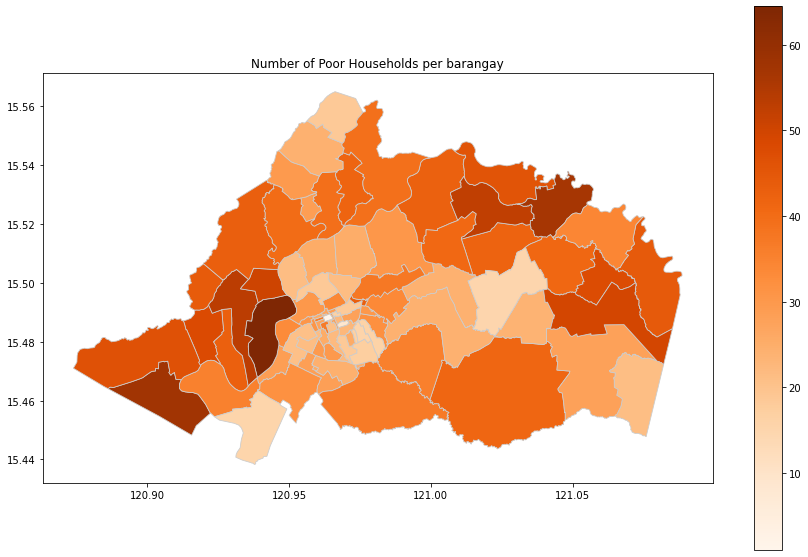

In [9]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Poor Household'
# set the range for the choropleth
vmin, vmax = merged_data1[variable].min(), merged_data1[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data1.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

# plt.xlim(115,130)
# plt.ylim(0,25)

plt.title('Number of Poor Households per barangay')

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

In [10]:
data_all = pd.read_csv('data/df_prop_rename.csv', index_col=[0])
data_geo = json.load(open('data/Barangays.json'))

In [11]:
data_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'ID_0': 177,
    'ISO': 'PHL',
    'NAME_0': 'Philippines',
    'ID_1': 1,
    'NAME_1': 'Abra',
    'ID_2': 16,
    'NAME_2': 'Manabo',
    'ID_3': 172,
    'NAME_3': 'San Jose Norte',
    'NL_NAME_3': '',
    'VARNAME_3': '',
    'TYPE_3': 'Barangay',
    'ENGTYPE_3': 'Village',
    'PROVINCE': 'Abra',
    'REGION': 'Cordillera Administrative Region (CAR)'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[120.700432, 17.45648],
      [120.703117, 17.45615],
      [120.706207, 17.45541],
      [120.707878, 17.453951],
      [120.711098, 17.45302],
      [120.710403, 17.45248],
      [120.709908, 17.45174],
      [120.701157, 17.451981],
      [120.700943, 17.451521],
      [120.700493, 17.450769],
      [120.699989, 17.44989],
      [120.699783, 17.449289],
      [120.748512, 17.448469],
      [120.747543, 17.447321],
      [120.74752, 17.44668],
      [120.747467, 17.445869],
      [120.747833,

In [12]:
data_all

,barangay,Malnourished Children 5 Yrs. Below,Infant Mortality Deaths,Living as Squatters,Living in Makeshift Housing,No Access to Safe Water,No Access to Sanitary Toilet,Ages (5 and below) Not in Kinder,Ages (6-11) Not in Elementary,Ages (12-15) Not in Junior High School,...,Ages (10 and above) Not Literate,Poor Household,Subsistently Poor Household,Experienced Food Shortage,Ages (15 and Above) Unemployed,Number of Victims of Crime,"Dependents Ages (0-14, 65+)",Unemployed Dependents,Household Total Members,cluster_labels
0,Aduas Centro (Aduas),0.828729,0.000000,2.166065,4.100052,0.000000,0.000000,15.384615,13.289760,17.241379,...,1.651605,18.540485,10.108303,0.567303,4.215619,0.025786,34.063950,64.259928,3878,2
1,Aduas Norte,1.098901,0.219780,2.464628,7.234140,0.068462,0.182565,24.000000,13.451327,23.495702,...,2.816108,21.542675,9.881333,0.753081,4.200627,0.182565,35.349156,65.130078,4382,2
2,Aduas Sur,0.677966,0.677966,3.217054,3.546512,0.000000,0.426357,30.851064,10.068259,24.317618,...,6.287497,33.817829,19.244186,1.937984,7.403375,0.232558,34.825581,67.034884,5160,2
3,Bagong Buhay,1.149425,1.149425,10.296412,1.404056,0.000000,4.680187,6.666667,6.666667,15.254237,...,6.072874,49.609984,36.505460,0.000000,7.042254,0.000000,40.093604,69.110764,641,0
4,Bagong Sikat,5.500982,0.589391,1.261524,2.620087,6.065017,0.436681,19.101124,8.611599,19.822485,...,4.865200,52.547307,36.244541,5.240175,3.897059,0.121300,37.457545,68.292091,4122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Valdefuente,1.526718,0.000000,1.482004,0.494001,0.141143,0.352858,32.075472,8.571429,16.460905,...,3.363133,25.441073,15.490473,0.635145,6.906615,0.070572,36.132675,66.231475,2834,2
85,Valle Cruz,5.088496,0.221239,1.673140,9.829698,0.000000,0.358530,25.352113,9.725686,18.106996,...,1.028180,35.703615,23.274574,0.000000,3.551251,0.029878,35.315208,64.296385,3347,0
86,Vijandre District (Pob.),3.125000,0.000000,7.281553,1.092233,0.606796,0.000000,21.052632,7.526882,25.714286,...,0.447761,30.825243,17.839806,1.941748,4.941860,0.121359,34.708738,60.315534,824,2
87,Villa Ofelia-Caridad,1.176471,0.000000,2.380952,1.410935,0.000000,0.000000,21.428571,7.500000,21.839080,...,4.356846,16.490300,9.964727,0.264550,2.777778,0.176367,31.305115,62.962963,1134,2


In [13]:
test = []
for i in tqdm(range(len(data_geo['features']))):
    if data_geo['features'][i]['properties']['NAME_2'] == "Cabanatuan City":
        test.append(data_geo['features'][i]['properties']['NAME_3'])
    
print(len(test))

  0%|          | 0/41933 [00:00<?, ?it/s]

89


In [14]:
new_data_geo =[]

for i in tqdm(range(len(data_geo['features']))):
    if data_geo['features'][i]['properties']['NAME_2'] == "Cabanatuan City":   
        new_data_geo.append(data_geo['features'][i])
             
new_data_geo

  0%|          | 0/41933 [00:00<?, ?it/s]

[{'type': 'Feature',
  'properties': {'ID_0': 177,
   'ISO': 'PHL',
   'NAME_0': 'Philippines',
   'ID_1': 55,
   'NAME_1': 'Nueva Ecija',
   'ID_2': 1121,
   'NAME_2': 'Cabanatuan City',
   'ID_3': 29345,
   'NAME_3': 'Aduas Centro',
   'NL_NAME_3': '',
   'VARNAME_3': 'Aduas',
   'TYPE_3': 'Barangay',
   'ENGTYPE_3': 'Village',
   'PROVINCE': 'Nueva Ecija',
   'REGION': 'Central Luzon (Region III)'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[120.965302, 15.50383],
     [120.965897, 15.50259],
     [120.968788, 15.4968],
     [120.967827, 15.49646],
     [120.963448, 15.49502],
     [120.961777, 15.49417],
     [120.960182, 15.49602],
     [120.958366, 15.49847],
     [120.959557, 15.49894],
     [120.959976, 15.50079],
     [120.958328, 15.50371],
     [120.961906, 15.50417],
     [120.96405, 15.50421],
     [120.965302, 15.50383]]]}},
 {'type': 'Feature',
  'properties': {'ID_0': 177,
   'ISO': 'PHL',
   'NAME_0': 'Philippines',
   'ID_1': 55,
   'NAME_1': 'Nueva Ecija'

In [15]:
data_geo['features'] = new_data_geo

In [16]:
data_all['barangay'] = test
data_all

,barangay,Malnourished Children 5 Yrs. Below,Infant Mortality Deaths,Living as Squatters,Living in Makeshift Housing,No Access to Safe Water,No Access to Sanitary Toilet,Ages (5 and below) Not in Kinder,Ages (6-11) Not in Elementary,Ages (12-15) Not in Junior High School,...,Ages (10 and above) Not Literate,Poor Household,Subsistently Poor Household,Experienced Food Shortage,Ages (15 and Above) Unemployed,Number of Victims of Crime,"Dependents Ages (0-14, 65+)",Unemployed Dependents,Household Total Members,cluster_labels
0,Aduas Centro,0.828729,0.000000,2.166065,4.100052,0.000000,0.000000,15.384615,13.289760,17.241379,...,1.651605,18.540485,10.108303,0.567303,4.215619,0.025786,34.063950,64.259928,3878,2
1,Aduas Norte,1.098901,0.219780,2.464628,7.234140,0.068462,0.182565,24.000000,13.451327,23.495702,...,2.816108,21.542675,9.881333,0.753081,4.200627,0.182565,35.349156,65.130078,4382,2
2,Aduas Sur,0.677966,0.677966,3.217054,3.546512,0.000000,0.426357,30.851064,10.068259,24.317618,...,6.287497,33.817829,19.244186,1.937984,7.403375,0.232558,34.825581,67.034884,5160,2
3,Bagong Buhay,1.149425,1.149425,10.296412,1.404056,0.000000,4.680187,6.666667,6.666667,15.254237,...,6.072874,49.609984,36.505460,0.000000,7.042254,0.000000,40.093604,69.110764,641,0
4,Bagong Sikat,5.500982,0.589391,1.261524,2.620087,6.065017,0.436681,19.101124,8.611599,19.822485,...,4.865200,52.547307,36.244541,5.240175,3.897059,0.121300,37.457545,68.292091,4122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Valdefuente,1.526718,0.000000,1.482004,0.494001,0.141143,0.352858,32.075472,8.571429,16.460905,...,3.363133,25.441073,15.490473,0.635145,6.906615,0.070572,36.132675,66.231475,2834,2
85,Valle Cruz,5.088496,0.221239,1.673140,9.829698,0.000000,0.358530,25.352113,9.725686,18.106996,...,1.028180,35.703615,23.274574,0.000000,3.551251,0.029878,35.315208,64.296385,3347,0
86,Vijandre District,3.125000,0.000000,7.281553,1.092233,0.606796,0.000000,21.052632,7.526882,25.714286,...,0.447761,30.825243,17.839806,1.941748,4.941860,0.121359,34.708738,60.315534,824,2
87,Villa Ofelia-Caridad,1.176471,0.000000,2.380952,1.410935,0.000000,0.000000,21.428571,7.500000,21.839080,...,4.356846,16.490300,9.964727,0.264550,2.777778,0.176367,31.305115,62.962963,1134,2


In [17]:
cab_choro_map = folium.Map(location = [15.494598024981352, 120.970035904559],tiles='cartodbpositron',zoom_start = 12)

cab_choro_map.choropleth(geo_data=data_geo,
                       data = data_all,
                       columns=['barangay','Poor Household'],
                       key_on ='feature.properties.NAME_3',
                       fill_color='YlGnBu',
                       fill_opacity = 0.3,
                       line_weight=2,)

cab_choro_map

C:\Users\Jac\anaconda3\envs\new_geo\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [27]:
with open("data/cabanatuan_brgy.json", "w") as outfile:
    json.dump(data_geo, outfile)
    
data_all.to_csv('data/df_prop_json_match.csv')

In [28]:
data_all

,barangay,Malnourished Children 5 Yrs. Below,Infant Mortality Deaths,Living as Squatters,Living in Makeshift Housing,No Access to Safe Water,No Access to Sanitary Toilet,Ages (5 and below) Not in Kinder,Ages (6-11) Not in Elementary,Ages (12-15) Not in Junior High School,...,Ages (10 and above) Not Literate,Poor Household,Subsistently Poor Household,Experienced Food Shortage,Ages (15 and Above) Unemployed,Number of Victims of Crime,"Dependents Ages (0-14, 65+)",Unemployed Dependents,Household Total Members,cluster_labels
0,Aduas Centro,0.828729,0.000000,2.166065,4.100052,0.000000,0.000000,15.384615,13.289760,17.241379,...,1.651605,18.540485,10.108303,0.567303,4.215619,0.025786,34.063950,64.259928,3878,2
1,Aduas Norte,1.098901,0.219780,2.464628,7.234140,0.068462,0.182565,24.000000,13.451327,23.495702,...,2.816108,21.542675,9.881333,0.753081,4.200627,0.182565,35.349156,65.130078,4382,2
2,Aduas Sur,0.677966,0.677966,3.217054,3.546512,0.000000,0.426357,30.851064,10.068259,24.317618,...,6.287497,33.817829,19.244186,1.937984,7.403375,0.232558,34.825581,67.034884,5160,2
3,Bagong Buhay,1.149425,1.149425,10.296412,1.404056,0.000000,4.680187,6.666667,6.666667,15.254237,...,6.072874,49.609984,36.505460,0.000000,7.042254,0.000000,40.093604,69.110764,641,0
4,Bagong Sikat,5.500982,0.589391,1.261524,2.620087,6.065017,0.436681,19.101124,8.611599,19.822485,...,4.865200,52.547307,36.244541,5.240175,3.897059,0.121300,37.457545,68.292091,4122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Valdefuente,1.526718,0.000000,1.482004,0.494001,0.141143,0.352858,32.075472,8.571429,16.460905,...,3.363133,25.441073,15.490473,0.635145,6.906615,0.070572,36.132675,66.231475,2834,2
85,Valle Cruz,5.088496,0.221239,1.673140,9.829698,0.000000,0.358530,25.352113,9.725686,18.106996,...,1.028180,35.703615,23.274574,0.000000,3.551251,0.029878,35.315208,64.296385,3347,0
86,Vijandre District,3.125000,0.000000,7.281553,1.092233,0.606796,0.000000,21.052632,7.526882,25.714286,...,0.447761,30.825243,17.839806,1.941748,4.941860,0.121359,34.708738,60.315534,824,2
87,Villa Ofelia-Caridad,1.176471,0.000000,2.380952,1.410935,0.000000,0.000000,21.428571,7.500000,21.839080,...,4.356846,16.490300,9.964727,0.264550,2.777778,0.176367,31.305115,62.962963,1134,2


In [29]:
cab_choro_map = folium.Map(location = [15.494598024981352, 120.970035904559],tiles='cartodbpositron',zoom_start = 12)

cab_choro_map.choropleth(geo_data=data_geo,
                       data = data_all,
                       columns=['barangay','Poor Household'],
                       key_on ='feature.properties.NAME_3',
                       fill_color='YlGnBu',
                       fill_opacity = 0.3,
                       line_weight=2,)

cab_choro_map

C:\Users\Jac\anaconda3\envs\new_geo\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
